In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import HDBSCAN
import folium

In [3]:
!pip install folium

In [4]:
df = pd.read_csv("latitude_longitude.csv")

In [5]:
df.describe()

,latitude_deg,longitude_deg,elevation_m
count,365.000000,365.000000,365.000000
mean,38.760187,-96.139260,373.421023
std,8.744451,27.393911,524.222963
min,-14.328056,-176.642783,-0.617033
25%,33.679699,-108.542999,27.499752
50%,39.141417,-92.549797,190.355072
75%,43.077944,-81.990501,383.739716
max,71.285402,145.729986,2357.643066


In [6]:
points = df[['latitude_deg','longitude_deg']].values

In [7]:
rads = np.radians(points)
clusterer = HDBSCAN(min_cluster_size=10, metric='haversine')
cluster_labels = clusterer.fit_predict(rads)
df['cluster_labels'] = cluster_labels

In [8]:
print(cluster_labels)

[ 1  0  1  1 -1 -1  0  1  1  1  1  1 -1  1  1  1 -1  0  1 -1  1  0 -1  1
  0 -1  0  1  1  2  1  1  1  1 -1  2 -1  1  1  1  1  0  1  1  1 -1  1  0
  1  2  1  2  1  1  1  0 -1  1  0  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  0  1  1 -1 -1 -1 -1 -1 -1  0  0 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  0  1  1  1  1 -1  1  2  1  1  1  1  1  1  1  1  2  1  1  1  1
  2 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1
  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1 -1  1 -1  1  1 -1
  1  1  1  1 -1 -1  2 -1  0  0  2  0 -1 -1 -1  1  2 -1 -1  2 -1  1  1  2
  1  1  1  1  2  0  1  1  2 -1  1 -1  2  1 -1  2  1 -1  1  1  0  0  2  0
  0 -1 -1  1  1 -1  1  1  1 -1  2  1  1  1  1  2  1  1  1  1  1  2 -1  1
  0  1  1 -1  2  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  0  1  1  1  1  1  1  1  1  1
 -1  1  1  1 -1  1  1  2  1  1  1  1  1  0  2  2  1

In [9]:
import matplotlib as mpl
import folium

center_lat, center_lon = df['latitude_deg'].mean(), df['longitude_deg'].mean()
map_clusters = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Choose a colormap by name
colormap_name = 'tab20'
colors = ['lightred', 'darkred', 'lightblue', 'pink', 'green', 'red', 'cadetblue', 'darkblue', 'white', 'beige', 'lightgreen', 'black', 'gray', 'darkpurple', 'lightgray', 'darkgreen', 'purple', 'orange', 'blue','lightred', 'darkred', 'lightblue', 'pink', 'green', 'red', 'cadetblue', 'darkblue', 'white', 'beige', 'lightgreen']

# Add markers for each airport with cluster color
for index, row in df.iterrows():
    color_hex  = colors[row['cluster_labels']]
    folium.Marker([row['latitude_deg'], row['longitude_deg']],
                  popup=f"Cluster: {row['cluster_labels']}",
                  icon=folium.Icon(color=color_hex)).add_to(map_clusters)

# Display the map directly in the notebook
map_clusters



In [10]:
!pip install branca

In [11]:
from sklearn.cluster import KMeans

def cluster_airports(airport_df, features, num_clusters):
    airport_df = airport_df[features]
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    airport_df['cluster_labels'] = kmeans.fit_predict(airport_df)
    return aiport_df

In [12]:
import pandas as pd
import folium.plugins 
import folium
from sklearn.cluster import KMeans
import matplotlib 
import branca
import branca.colormap as cm

data = df[['latitude_deg', 'longitude_deg']]
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster_labels'] = kmeans.fit_predict(data)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['latitude_deg', 'longitude_deg'])
print(cluster_centers)
colors = ['lightred', 'darkred', 'lightblue', 'pink', 'green', 'red', 'black', 'gray', 'white', 'beige', 'lightgreen', 'black', 'gray', 'darkpurple', 'lightgray', 'darkgreen', 'purple', 'orange', 'blue','lightred', 'darkred', 'lightblue', 'pink', 'green', 'red', 'cadetblue', 'darkblue', 'white', 'beige', 'lightgreen']
# colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray', 'yellow', 'brown', 'olive', 'teal', 'cyan', 'magenta', 'fuchsia', 'lime', 'maroon', 'navy', 'ivory', 'snow', 'linen', 'wheat', 'honeydew']
center_lat, center_lon = df['latitude_deg'].mean(), df['longitude_deg'].mean()
map_clusters = folium.Map(location=[center_lat, center_lon], zoom_start=5)
# for index, row in (df.iterrows()):
#     color_hex = colors[row['cluster_labels']]
#     folium.Marker([row['latitude_deg'], row['longitude_deg']],
#                   popup=f"Cluster: {row['cluster_labels']}",
#                   icon=folium.Icon(color=color_hex)).add_to(map_clusters)
#df.to_csv("latitude_longitude_cluster.csv", index=False)
map_clusters

/home/shared/code/my-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shared/code/my-venv/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'lscpu'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/home/shared/code/my-venv/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
  File "/usr/lib/python3.9/subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/usr/lib/python3.9/subprocess.py", 

    latitude_deg  longitude_deg
0      44.806843     -92.175148
1      37.485769    -121.170869
2      14.302773     145.265399
3      64.169000    -147.948750
4      31.841124     -87.953225
5      36.025834     -78.451879
6      20.731069    -156.957610
7      40.129850    -106.600423
8     -14.328056    -170.711945
9      27.598644     -81.445144
10     51.883564    -176.642783
11     31.623252     -94.307489
12     18.200306     -65.902164
13     45.833371    -121.352567
14     57.239349    -134.457732
15     40.514860     -98.009079
16     39.856188     -82.080331
17     44.140599    -112.418681
18     42.249658     -72.061057
19     65.865525    -161.662003
20     32.897215     -82.707945
21     34.325597    -114.923315
22     36.317195     -95.782696
23     58.490387    -155.882731
24     46.681154     -99.991829
25     39.398129     -88.799650
26     33.644729    -103.062988
27     41.324949     -76.463641
28     44.139077     -86.067731
29     28.199809     -98.352105


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

columns_to_scale = ['elevation_m']

scaler = RobustScaler()

scaled_data = df.copy()
scaled_data[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

scaled_data.describe()

,latitude_deg,longitude_deg,elevation_m,cluster_labels
count,365.000000,365.000000,365.000000,365.000000
mean,38.760187,-96.139260,0.513884,15.424658
std,8.744451,27.393911,1.471545,8.830078
min,-14.328056,-176.642783,-0.536077,0.000000
25%,33.679699,-108.542999,-0.457151,7.000000
50%,39.141417,-92.549797,0.000000,16.000000
75%,43.077944,-81.990501,0.542849,23.000000
max,71.285402,145.729986,6.083787,29.000000


In [33]:
import pandas as pd
import folium.plugins 
import folium
from sklearn.cluster import KMeans
import matplotlib 
import branca
import branca.colormap as cm

data = scaled_data[['latitude_deg', 'longitude_deg', 'elevation_m']]
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
scaled_data['cluster_labels'] = kmeans.fit_predict(data)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['latitude_deg', 'longitude_deg', 'elevation_m'])
print(cluster_centers)
colors = ['gray', 'darkred', 'black', 'pink', 'green', 'red', 'lightblue', 'darkblue', 'white', 'beige', 'lightgreen', 'black', 'gray', 'darkpurple', 'lightgray', 'darkgreen', 'purple', 'orange', 'blue','lightred', 'darkred', 'lightblue', 'pink', 'green', 'red', 'cadetblue', 'darkblue', 'white', 'beige', 'lightgreen']
center_lat, center_lon = scaled_data['latitude_deg'].mean(), scaled_data['longitude_deg'].mean()
map_clusters = folium.Map(location=[center_lat, center_lon], zoom_start=5)
for index, row in (scaled_data.iterrows()):
    color_hex = colors[row['cluster_labels']]
    folium.CircleMarker([row['latitude_deg'], row['longitude_deg']],  fill=True,
        fill_color=color_hex, radius = 6, color= "Black", weight=1,
        fill_opacity=1.0, popup=f"Cluster: {row['cluster_labels']}, Elevation: {row['elevation_m']}").add_to(map_clusters)
# df.to_csv("latitude_longitude_cluster", index=False)
map_clusters

/home/shared/code/my-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    latitude_deg  longitude_deg  elevation_m
0      40.129850    -106.600423     4.438526
1      14.302773     145.265399    -0.335041
2      38.685111     -88.965625    -0.048484
3      64.169000    -147.948750    -0.398566
4      20.731069    -156.957610    -0.499256
5      42.289451     -72.311504    -0.381244
6      39.263896    -122.274985    -0.045540
7      38.007321     -96.999962     0.668929
8      44.185505     -87.186067     0.189044
9      18.200306     -65.902164    -0.426615
10     34.979130     -80.132013    -0.032933
11     57.239349    -134.457732    -0.496027
12     65.865525    -161.662003    -0.495966
13     41.465143    -113.578811     3.319598
14    -14.328056    -170.711945    -0.526670
15     40.426368     -76.914903    -0.068737
16     28.803632     -97.836846    -0.194664
17     46.681154     -99.991829     0.901584
18     28.139726     -81.561570    -0.501972
19     34.398048    -112.946344     1.643727
20     51.883564    -176.642783    -0.500660
21     32.

In [32]:
import io
from PIL import Image

width = 600
height = 800
img_data = map_clusters._to_png(width, height)
img = Image.open(io.BytesIO(img_data))
img.save('image_1.png')

/home/shared/code/my-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shared/code/my-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shared/code/my-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shared/code/my-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

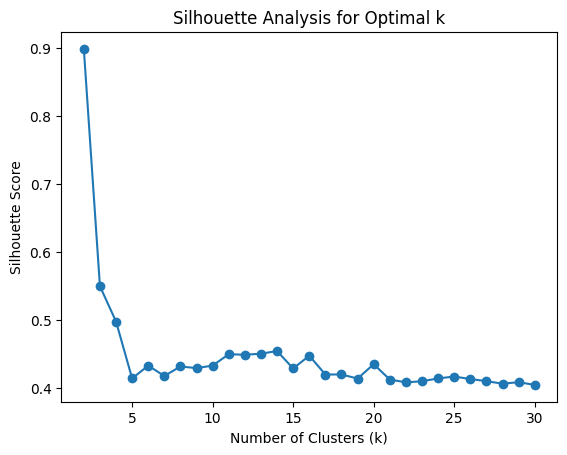

In [17]:
import pandas as pd
import folium
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'latitude_deg' and 'longitude_deg' columns
data = df[['latitude_deg', 'longitude_deg']]

# Choose a range of k values
k_values = range(2, 31)  # Adjust the range based on your preferences

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster_labels'] = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, df['cluster_labels'])
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different k values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()


/home/shared/code/my-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shared/code/my-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shared/code/my-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shared/code/my-venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

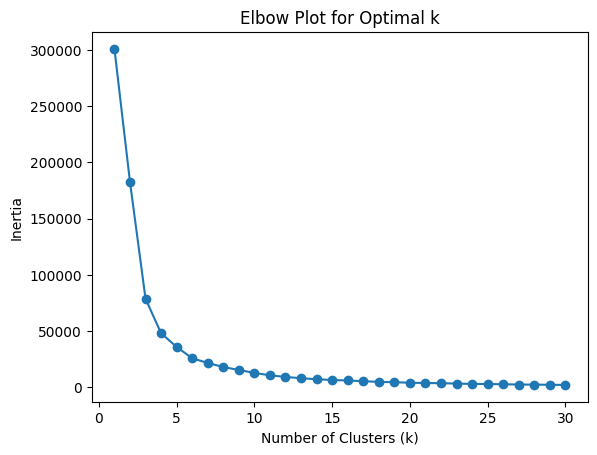

In [18]:
import pandas as pd
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'latitude_deg' and 'longitude_deg' columns
data = df[['latitude_deg', 'longitude_deg']]

# Choose a range of k values
k_values = range(1, 31)  # Adjust the range based on your preferences

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal k')
plt.show()


In [19]:
!pip install hvplot